In [0]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from scipy import integrate


##4.21 i.)


In [0]:
# Define f(x)
normal = stats.norm(0,1).pdf
f = lambda x: sum([normal(x-3*k) for k in range(1,5)])/4

# Define a draw from f
def draw_f():
  k = np.random.randint(1,5)
  z = np.random.randn()
  return z + 3*k

# x = 1000 draws from f
n = 1000
x = np.array([draw_f() for _ in range(n)])



## 4.21 ii.)

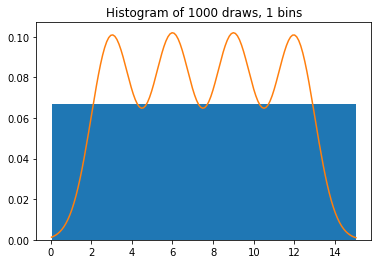

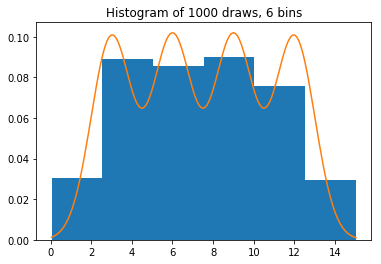

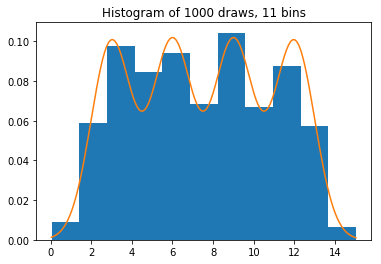

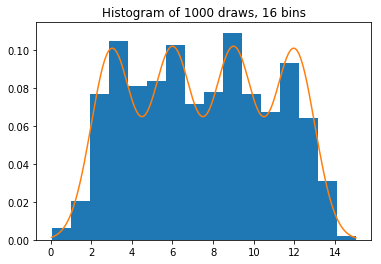

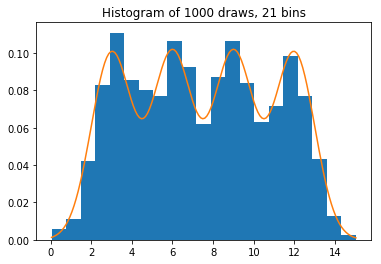

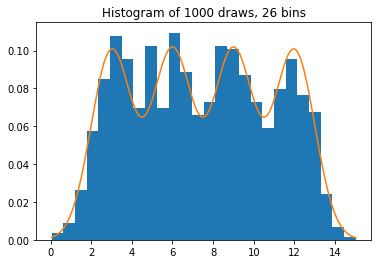

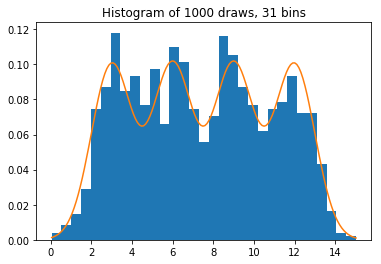

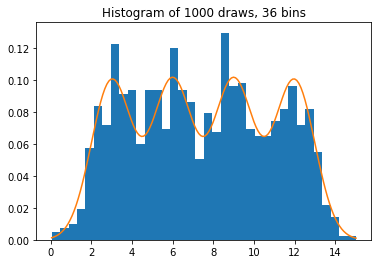

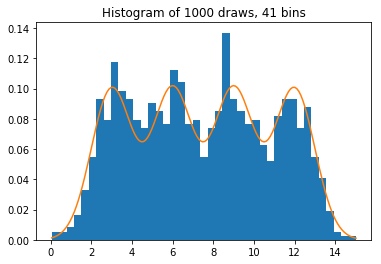

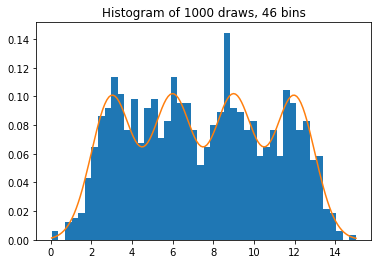

In [110]:

# define a and b 
a = min(x)
b = max(x)
domain = np.linspace(a,b,150)

# define bin counts
m = np.arange(1,50,5)

# Plot histograms for x on each of the bin sizes m
for bins in m:
  plt.hist(x,bins = bins, density=True)
  plt.plot(domain, f(domain))
  plt.title("Histogram of 1000 draws, {} bins".format(bins))
  plt.show()


## 4.21 iii.)

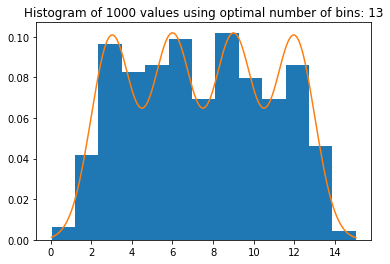

In [111]:
# Compute Freedman-Diaconis rule

# Sort x
x.sort()

# First get 1st and 3rd quartile
Q1 = x[249]
Q3 = x[749]

# Get optimal bin width
opt_bin_width = 2 * (Q3 - Q1) / 10 # <--- 10 is the cube root of 1000


# Plot histogram using that bin width

# Find the optimal number of bins given the bin width
optimal_m = int((b-a)/opt_bin_width) + 1

plt.hist(x, bins = optimal_m,density = True)
plt.plot(domain, f(domain))
plt.title("Histogram of 1000 values using optimal number of bins: {}".format(optimal_m))
plt.show()

## 4.21 iv.)


In [112]:
ise_list = []
hist_list = []
for bins in m:
  hist = np.histogram(x,bins=bins, density=True)[0]
  hist_list.append(hist)
  h = (b-a)/bins
  ise = 2/(h*(n - 1)) - (n + 1 )/(h*(n - 1)*n**2) * sum(hist**2)
  ise_list.append(ise)

for b,i in zip(m,ise_list):
  print("bins:",b,"--",i)
print("Optimal value of m:", m[np.argmin(ise_list)])

bins: 1 -- 0.00013371310151287573
bins: 6 -- 0.0008022679756110424
bins: 11 -- 0.0014708031901271795
bins: 16 -- 0.0021393194494388084
bins: 21 -- 0.0028078166710240084
bins: 26 -- 0.0034762957636269923
bins: 31 -- 0.004144752821159443
bins: 36 -- 0.00481318910665455
bins: 41 -- 0.005481613288417599
bins: 46 -- 0.006150012178994321
Optimal value of m: 1


## 4.21 v.)

In [113]:
true_ise_list = []
for hist, bins in zip(hist_list, m):
  step = (b-a)/bins
  fx = lambda x : (hist[int((x-a)/step)] - f(x))**2 
  ise,_ = integrate.quad(fx,a,b)
  true_ise_list.append(ise)

print("True ISE values")
for bins, ise in zip(m,true_ise_list):
  print("bins:",bins,"--",ise)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


True ISE values
bins: 1 -- 0.15313107827540598
bins: 6 -- 0.2008480752802998
bins: 11 -- 0.20637978543325447
bins: 16 -- 0.21116801601697902
bins: 21 -- 0.21309899926608725
bins: 26 -- 0.21303670895969673
bins: 31 -- 0.2143474426806763
bins: 36 -- 0.21707691009846572
bins: 41 -- 0.2160940751504103
bins: 46 -- 0.21729487110782936


I am still not convinced that we were given the proper equation for estimated ISE, as the values do not match the True ISE at all.